In [99]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from hiEEG_functions import *

# Style
sns.set_theme(context='talk', style='white', palette='Set2')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


# Load Data

In [3]:
# Load file
folder='data/hiEEG'
file_string = f'Data_Subject_{1:02d}_Session_{1:02d}'
f = h5py.File(os.path.join(folder, file_string) + '.h5', 'r')

# Load data
data, meta = load_hiEEG_data(1, 1)


### Microelectrode Data

In [9]:
import pynwb

### Micro data
folder='data/hiEEG/000574/sub-01'
file_string = f'sub-01_ses-20161214T171300_behavior+ecephys.nwb'
nwbfile = pynwb.NWBHDF5IO(os.path.join(folder, file_string), mode='r').read()
nwbfile


root pynwb.file.NWBFile at 0x2360621866576
Fields:
  acquisition: {
    ecephys.eeg <class 'pynwb.ecephys.ElectricalSeries'>,
    ecephys.ieeg <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    ATLAS Neurophysiology System <class 'pynwb.device.Device'>,
    NicoletOne EEG System <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    eeg <class 'pynwb.ecephys.ElectrodeGroup'>,
    ieeg <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  epochs: epochs <class 'pynwb.epoch.TimeIntervals'>
  experiment_description: Task Name: Sternberg
Task Description: The task is a modified Sternberg task in which the encoding of memory items, maintenance, and recall were temporally separated. Each trial starts with a fixation period ([-6, -5] s), followed by the stimulus ([-5, -3] s). The stimulus consists of a set of eight consonants at the center of the screen. The middle four, six, or eight letters are the memory items,which determine the set size for the trial (4, 6, or 8, respectively). The outer positions are filled with “X,” which is never a memory item. After the stimulus, the letters disappear from the screen, and the maintenance interval starts ([-3, 0] s).A fixation square is shown throughout fixation, encoding, and maintenance. After maintenance, a probe letter is presented. The subjects respond with a button press to indicate whether the probe was part of the stimulus.The subjects are instructed to respond as rapidly as possible without making errors. The hand used for the response is counterbalanced across subjects within the clinical constraints. After the response, the probe is turned off, and the subjects receive acoustic feedback regarding whether their response was correct or incorrect. Before initiating the next trial, the subjects were encouraged to blink and relax. The subjects perform 50 trials in one session, which last approximately 10 min. Trials with different set sizes are presented in a random order,with the single exception that a trial with an incorrect response is always followed by a trial with a set size of 4.
Task URL: http://www.neurobs.com/ex_files/expt_view?id=266
  experimenter: ['Boran, Ece']
  file_create_date: [datetime.datetime(2023, 10, 9, 22, 9, 55, 869508, tzinfo=tzoffset(None, 7200))]
  identifier: Human_MTL_units_scalp_EEG_and_iEEG_verbal_WM_subject01_session01
  institution: Universitätsspital Zürich, 8091 Zurich, Switzerland
  intervals: {
    epochs <class 'pynwb.epoch.TimeIntervals'>,
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <StrDataset for HDF5 dataset "keywords": shape (16,), type "|O">
  lab: Schweizerische Epilepsie-Zentrum, 8008 Zurich, Switzerland
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  related_publications: ['doi: 10.1126/sciadv.aav3687']
  session_description: Running experiment as described in the the experiment description
  session_start_time: 2016-12-14 17:13:00+01:00
  subject: subject pynwb.file.Subject at 0x2360621825664
Fields:
  age: P24Y
  age__reference: birth
  description: Handedness: Right
Pathology: Xanthoastrocytoma WHO II
Depth electrodes: AHL,AL,ECL,LR,PHL,PHR
Electrodes in seizure onset zone (SOZ): AHR,LR
  sex: F
  species: Homo sapiens
  subject_id: 01

  timestamps_reference_time: 2016-12-14 17:13:00+01:00
  trials: trials <class 'pynwb.epoch.TimeIntervals'>
  units: units <class 'pynwb.misc.Units'>

In [28]:
# Get data
micro_data = nwbfile.processing['ecephys'].data_interfaces['LFP'].electrical_series['ecephys.lfp'].data[:]
micro_time = nwbfile.processing['ecephys'].data_interfaces['LFP'].electrical_series['ecephys.lfp'].timestamps[:]
micro_electrodes = nwbfile.processing['ecephys'].data_interfaces['LFP'].electrical_series['ecephys.lfp'].electrodes[:]
print(micro_data.shape)


(12800000, 32)

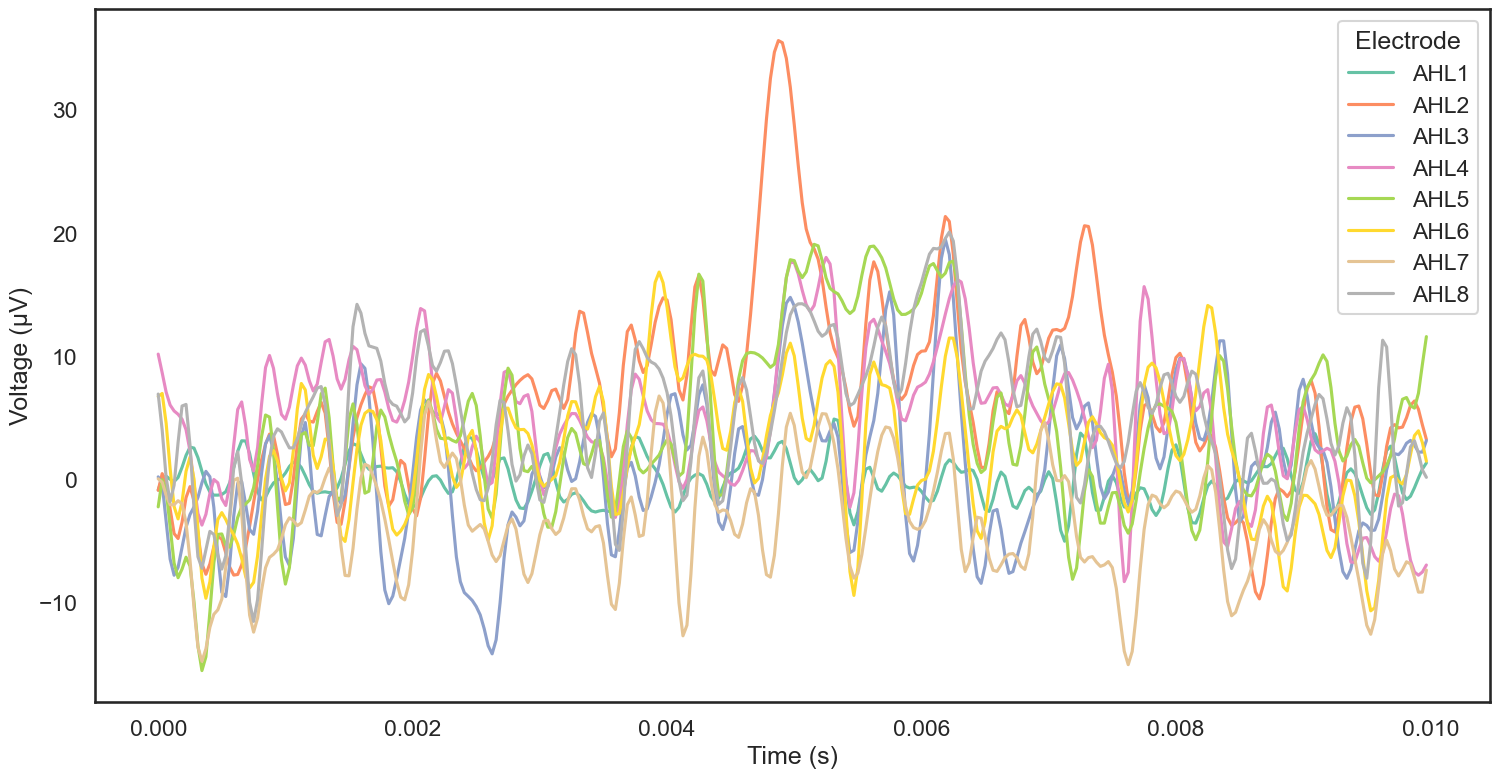

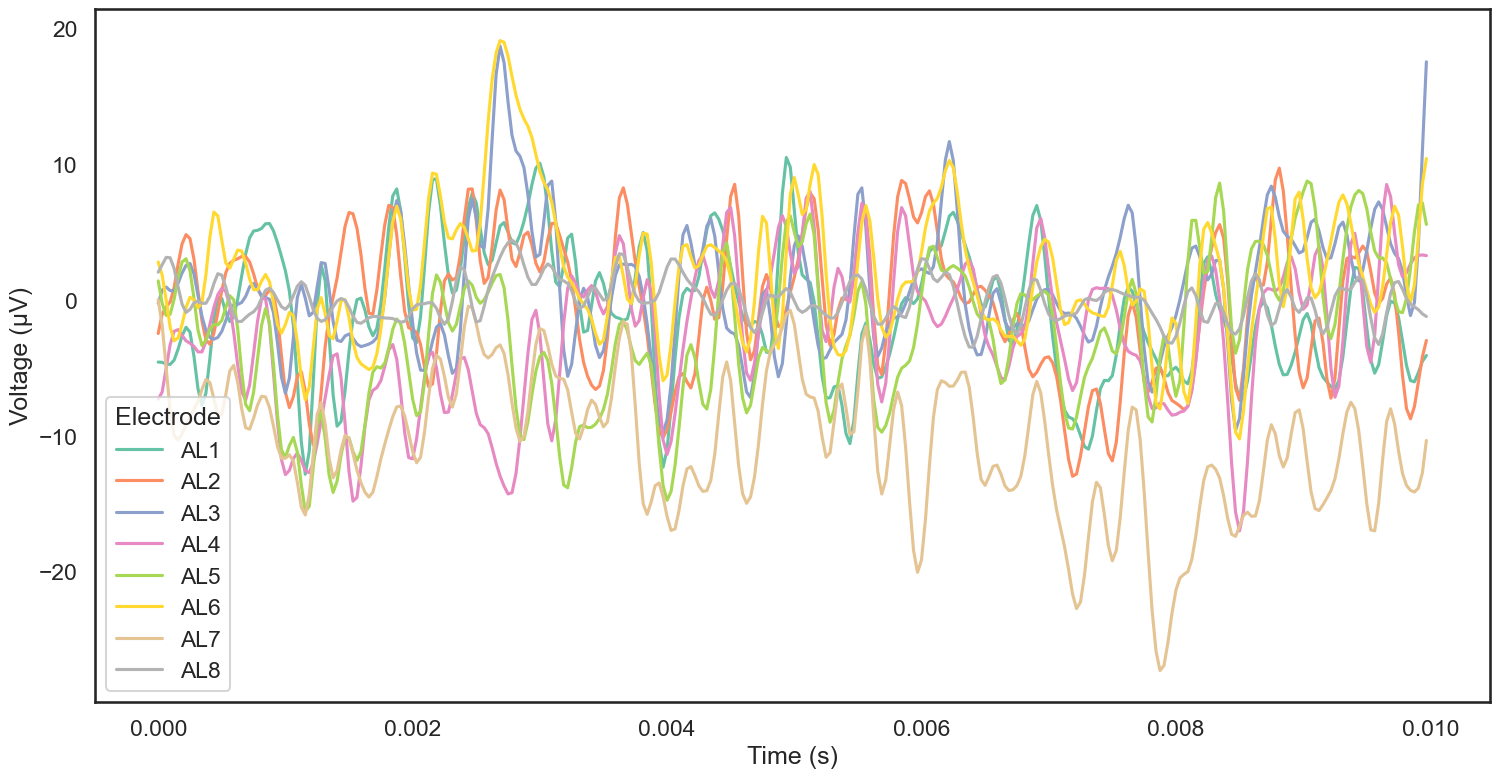

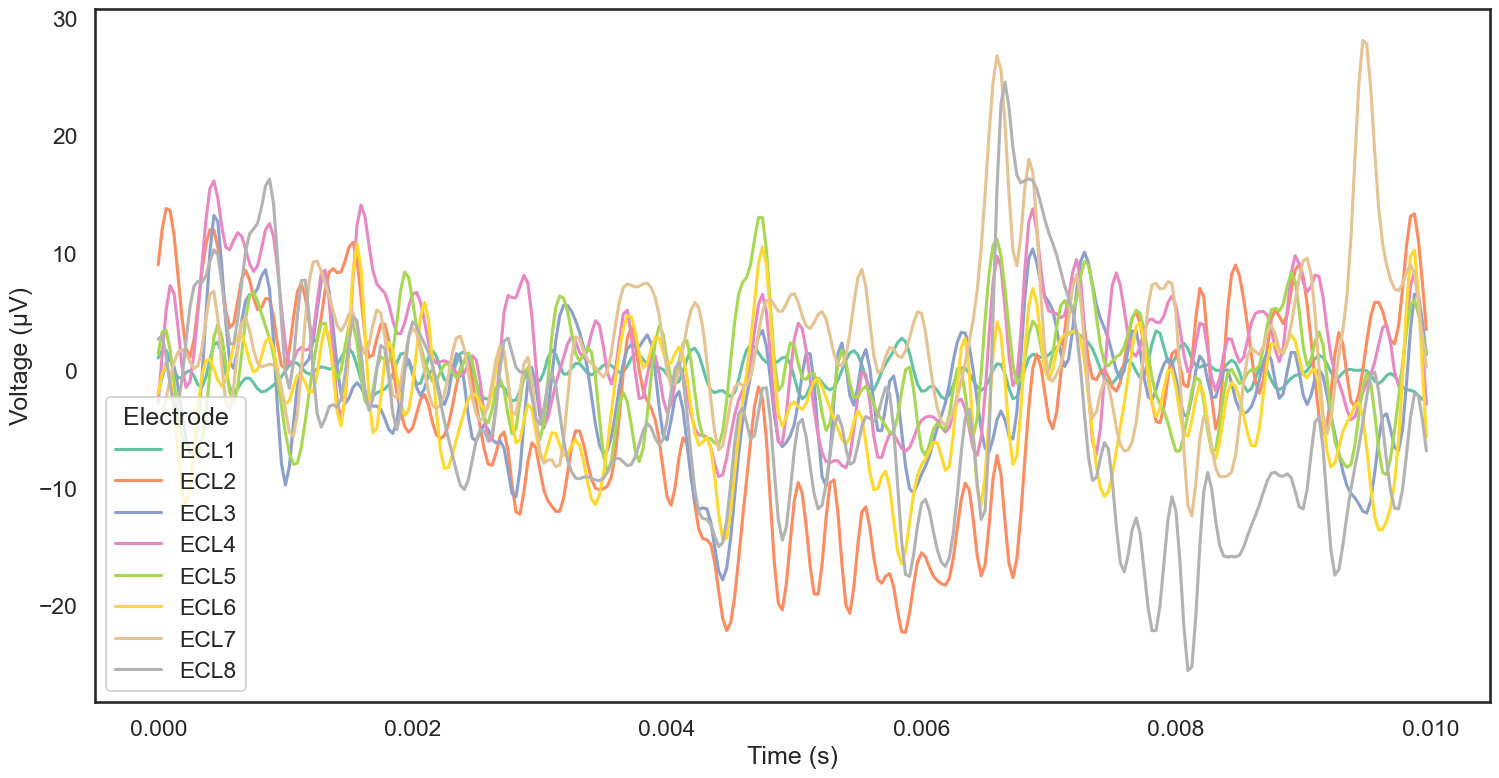

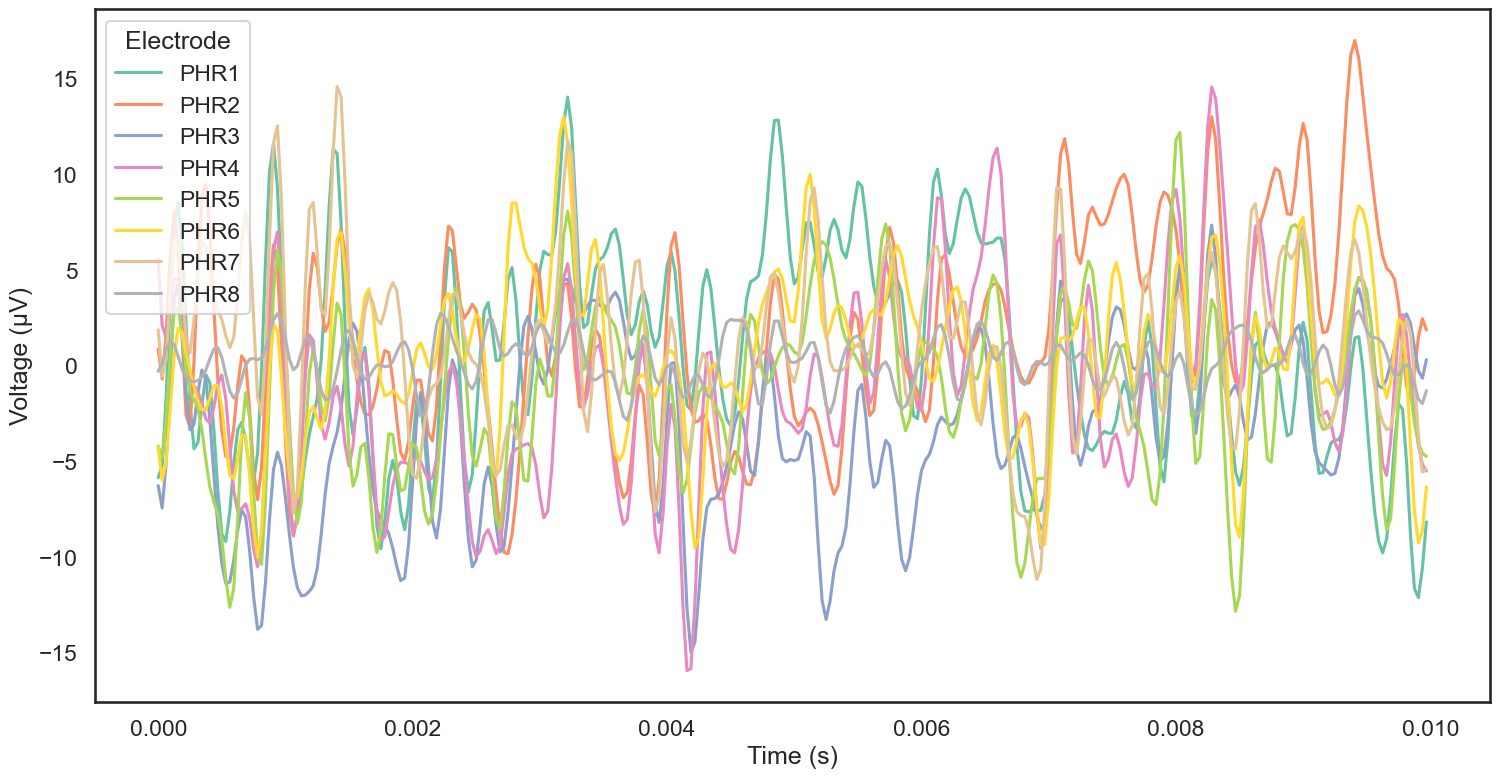

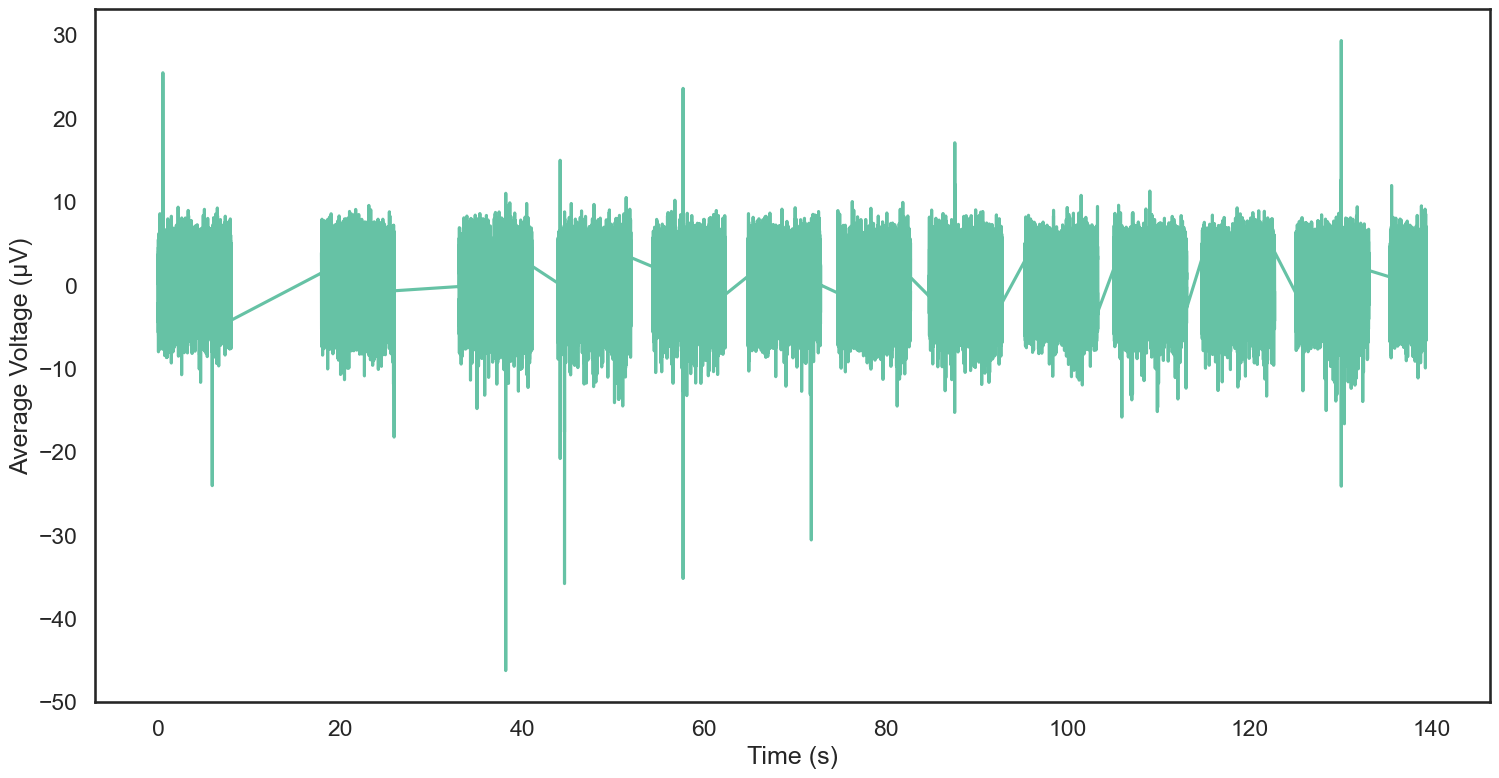

In [104]:
# Plot individual
np.random.seed(42)
# idx = np.random.choice(micro_time.shape[0], 1000, replace=False)
idx = list(range(int(.01 * 32_000)))
df = pd.DataFrame(micro_data[idx], index=pd.Series(micro_time[idx], name='Time (s)'), columns=micro_electrodes['label'])
df = df.reset_index().melt(id_vars='Time (s)', var_name='Electrode', value_name='Voltage (μV)')
step = 8
for i in range(0, micro_data.shape[1], step):
    fig, ax = plt.subplots(1, 1, figsize=(18, 9))
    df_filtered = df.iloc[[s in list(micro_electrodes['label'].iloc[i:i+8]) for s in df['Electrode']]]
    sns.lineplot(df_filtered, x='Time (s)', y='Voltage (μV)', hue='Electrode', ax=ax)
    plt.show()

# Plot average
df = pd.DataFrame({'Time (s)': micro_time, 'Average Voltage (μV)': micro_data.mean(axis=1)})
idx = list(range(int(100 * 32_000)))
fig, ax = plt.subplots(1, 1, figsize=(18, 9))
sns.lineplot(df.iloc[idx], x='Time (s)', y='Average Voltage (μV)', ax=ax)
plt.show()


# Visualize

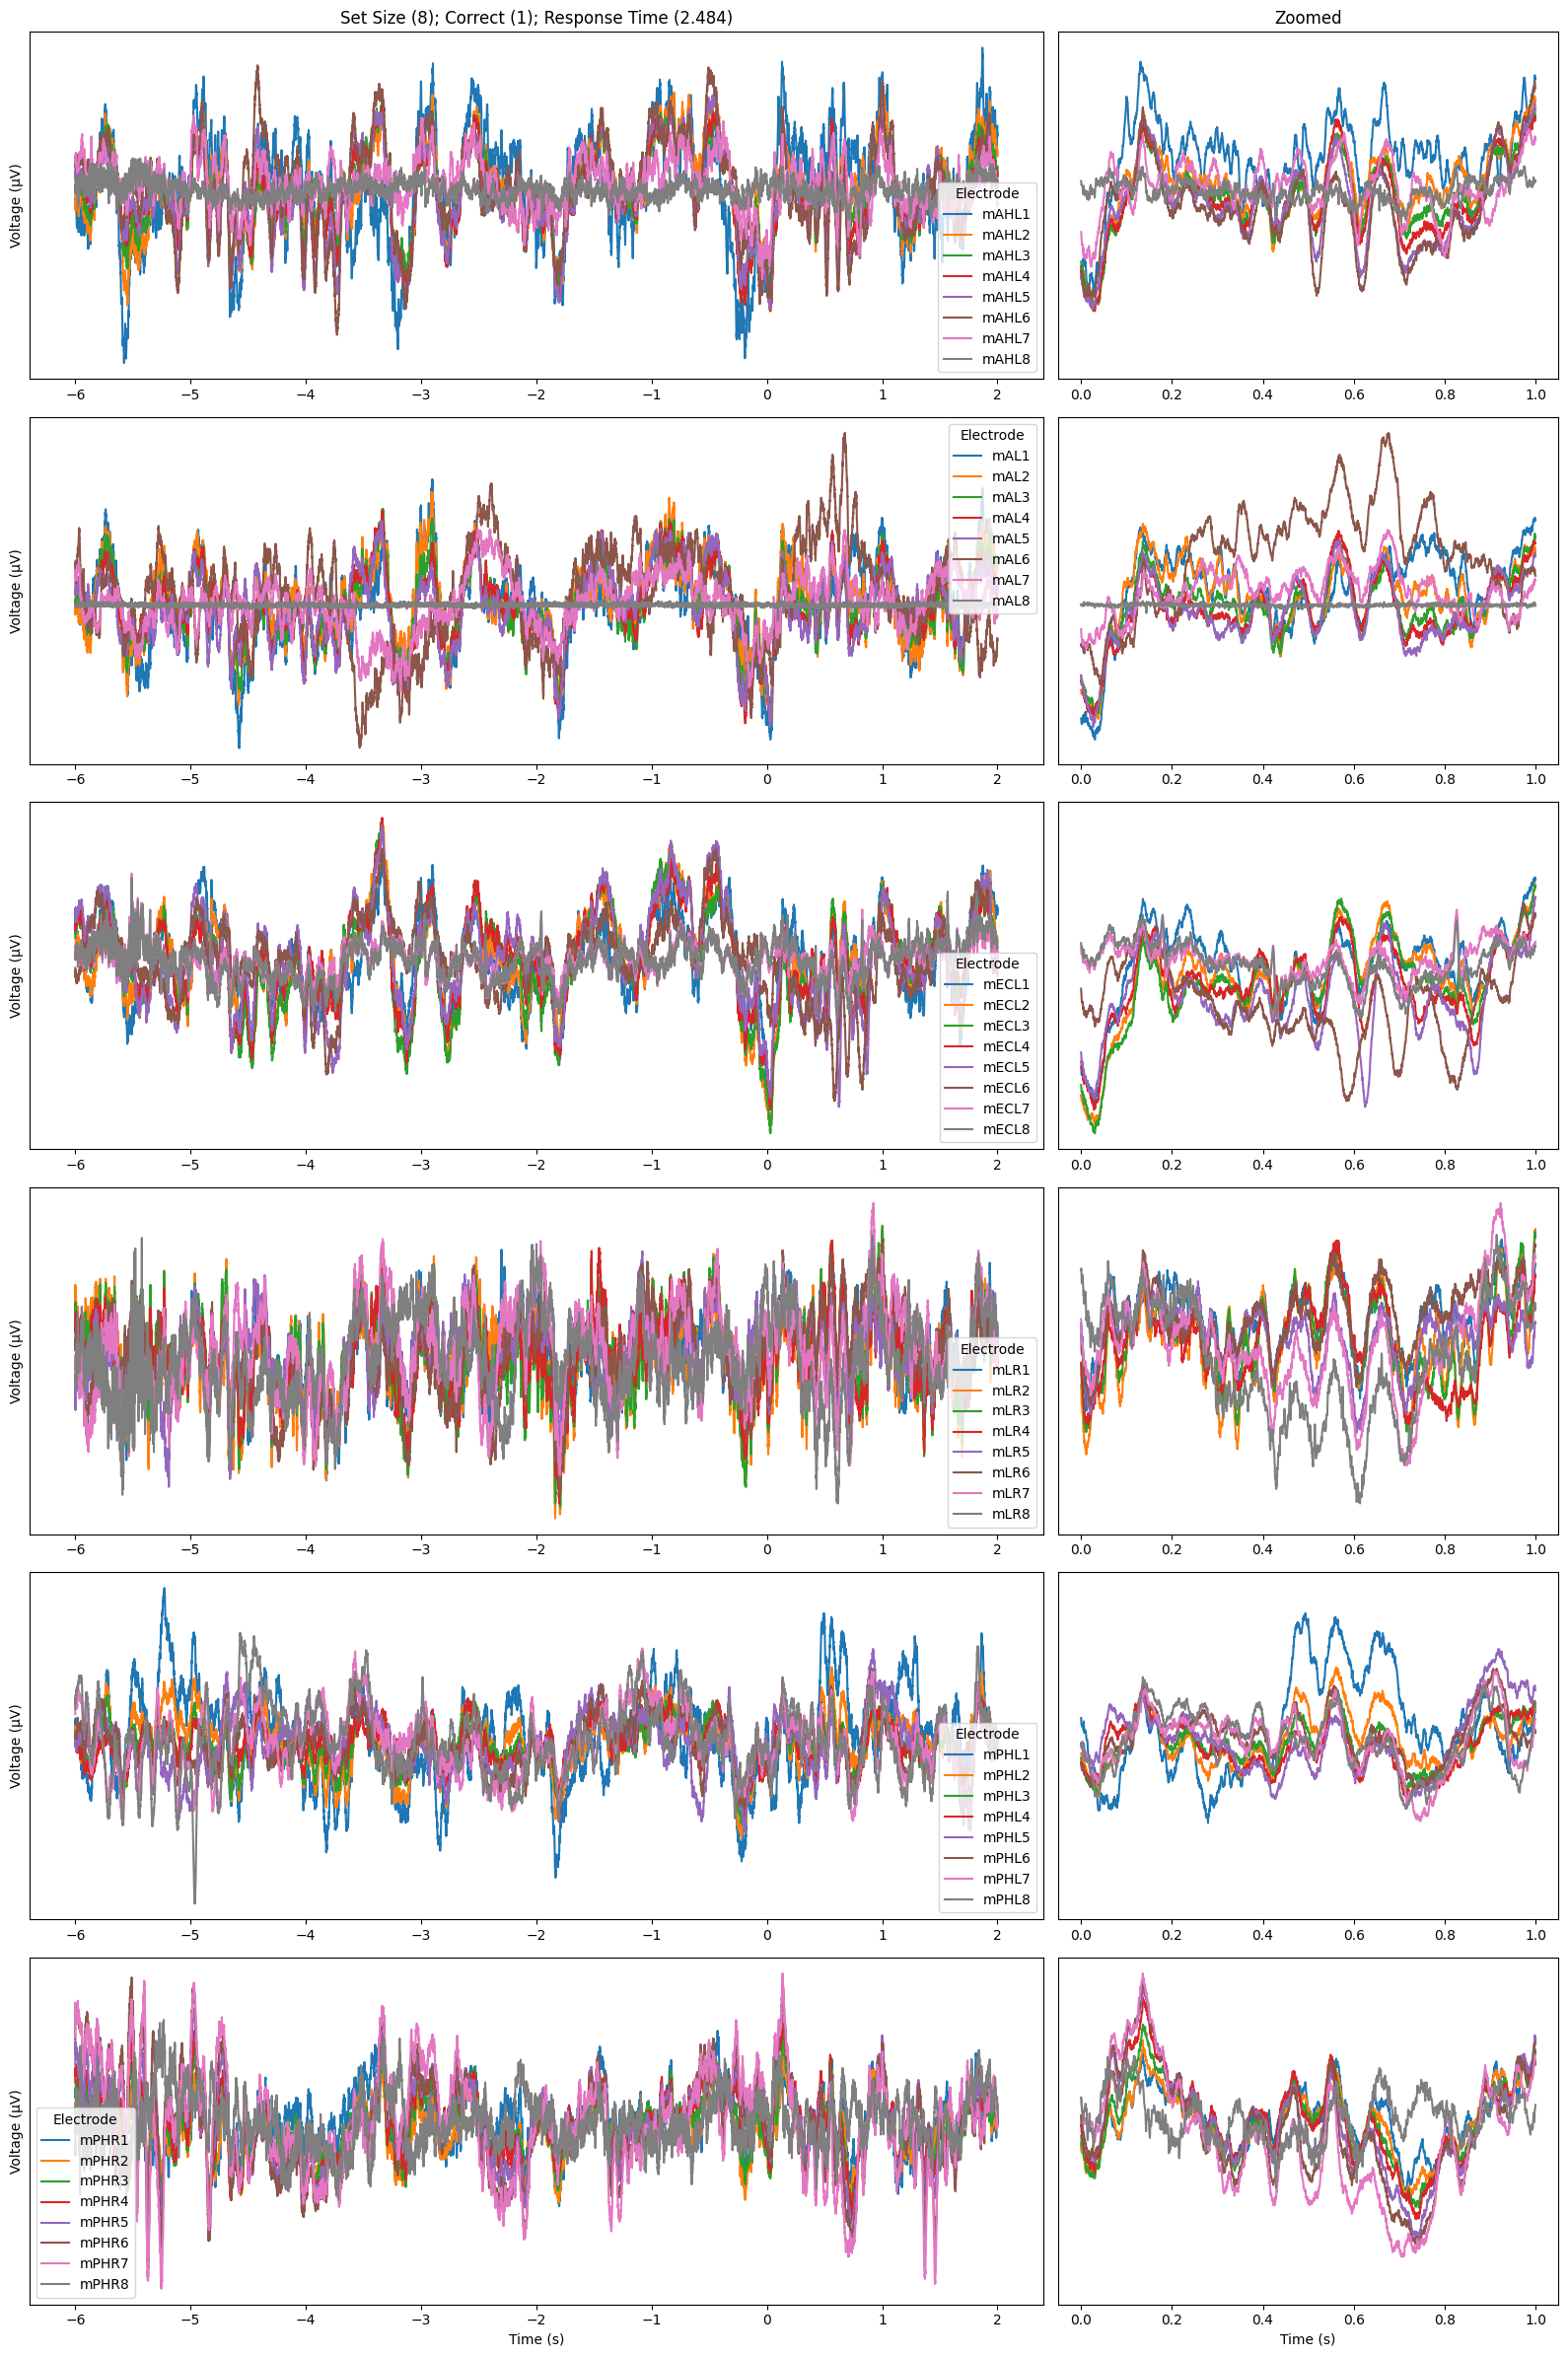

In [3]:
# TODO: Plot brain coordinates
# Set variables
trial_num = 0
time, waveform, electrode_names = data[trial_num]['time'], data[trial_num]['waveform'], data[trial_num]['electrode_names']
set_size, correct, response_time = meta[trial_num]['set_size'], meta[trial_num]['correct'], meta[trial_num]['response_time']
df = (
    pd.DataFrame(waveform, index=electrode_names, columns=time)
        .reset_index(names='Electrode')
        .melt(id_vars='Electrode', var_name='Time (s)', value_name='Voltage (μV)')
)

# Make figure
scale = 4
split = int(48/8)  # How many sections?
fig, axs = plt.subplot_mosaic([4*[i] + 2*[i+1] for i in range(0, split*2, 2)], figsize=(scale*4, scale*split))  # sharex=True
# Share x across all vertically stacked plots
[axs[i].sharex(axs[i+2]) for i in range(0, (split*2)-2, 2)]
[axs[(i+1)].sharex(axs[(i+1)+2]) for i in range(0, (split*2)-2, 2)]

# Plot
for i in range(0, split*2, 2):
    # Variables
    last = i == split*2-2

    # Filter to electrodes
    df_filtered = df.loc[df['Electrode'].map(lambda x: x in electrode_names[int(i/2*electrode_names.shape[0]/split):int((i/2+1)*electrode_names.shape[0]/split)])]

    # Regular plot
    plt.sca(axs[i])
    sns.lineplot(
        data=df_filtered,
        x='Time (s)',
        y='Voltage (μV)',
        hue='Electrode',
        ax=axs[i])
    if not last: axs[i].set_xlabel(None)

    # Zoomed plot
    sns.lineplot(
        data=df_filtered.loc[(df_filtered['Time (s)'] >= 0) * (df_filtered['Time (s)'] <= 1)],
        x='Time (s)',
        y='Voltage (μV)',
        hue='Electrode',
        legend=False,
        ax=axs[i+1])
    if not last: axs[i+1].set_xlabel(None)
    axs[i+1].set_ylabel(None)
    axs[i+1].set_yticks([])

    # Share y axis
    axs[i].sharey(axs[i+1])

    # Title based on meta
    if i == 0:
        axs[i].set_title(f'Set Size ({int(set_size):d}); Correct ({int(correct):d}); Response Time ({response_time:.3f})')
        axs[i+1].set_title('Zoomed')

# Formatting
plt.tight_layout()
